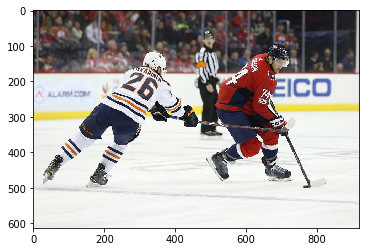

In [1]:
import numpy as np
import cv2 as cv
import matplotlib
%matplotlib inline
import pylab as plt

img_num = 532;
test_image = 'testing/sample_image/hockey.jpg'

oriImg = cv.imread(test_image) # B,G,R order
f = plt.imshow(oriImg[:,:,[2,1,0]]) # reorder it before displaying

Limb 0: 15 matches made
Limb 1: 15 matches made
Limb 2: 7 matches made
Limb 3: 5 matches made
Limb 4: 5 matches made
Limb 5: 2 matches made
Limb 6: 5 matches made
Limb 7: 3 matches made
Limb 8: 3 matches made
Limb 9: 5 matches made
Limb 10: 3 matches made
Limb 11: 3 matches made
Limb 12: 11 matches made
Limb 13: 11 matches made
Limb 14: 9 matches made
Limb 15: 10 matches made
Limb 16: 5 matches made
Limb 17: 10 matches made
Limb 18: 6 matches made


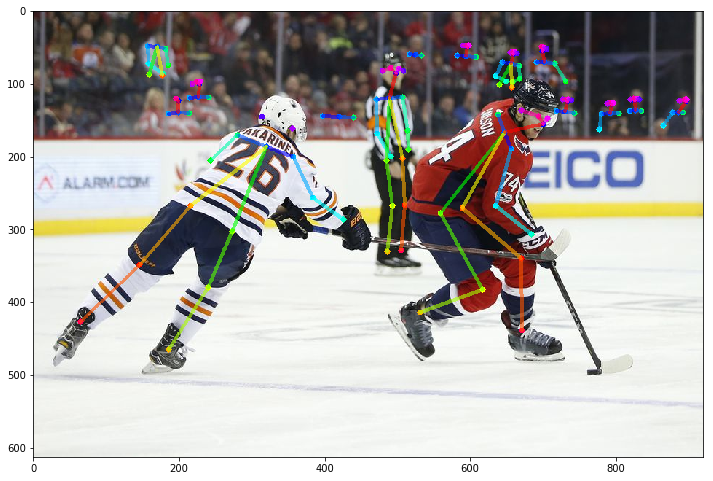

In [2]:
import testing.python.predictor as predictor

openpose_predict = predictor.OpenPosePredictor()
parts_dt = openpose_predict.getPoseModels(test_image)

## Show the body parts detected
canvas = openpose_predict.drawPoseModels()
## Resize
plt.imshow(canvas[:,:,[2,1,0]])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 12)

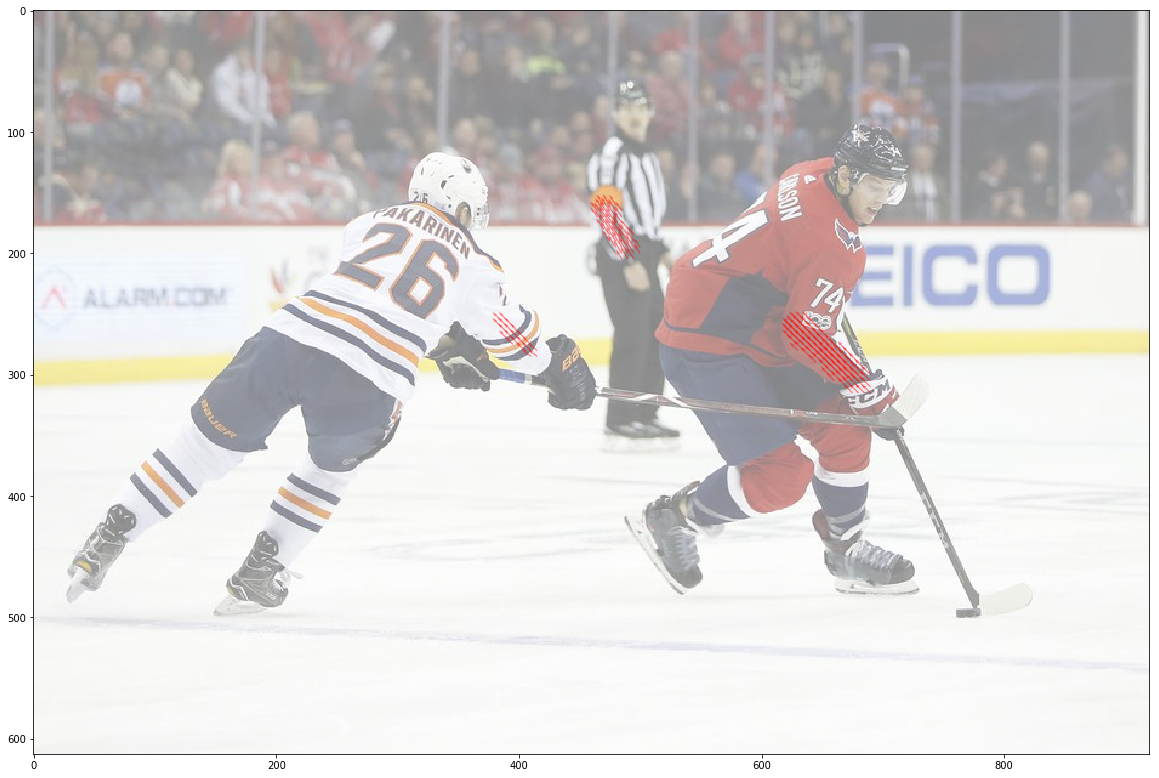

In [3]:
from numpy import ma
paf_avg = openpose_predict.paf_agg
U = paf_avg[:,:,16] * -1
V = paf_avg[:,:,17]
X, Y = np.meshgrid(np.arange(U.shape[1]), np.arange(U.shape[0]))
M = np.zeros(U.shape, dtype='bool')
M[U**2 + V**2 < 0.5 * 0.5] = True
U = ma.masked_array(U, mask=M)
V = ma.masked_array(V, mask=M)

# 1
plt.figure()
plt.imshow(oriImg[:,:,[2,1,0]], alpha = .5)
s = 5
Q = plt.quiver(X[::s,::s], Y[::s,::s], U[::s,::s], V[::s,::s], 
               scale=50, headaxislength=4, alpha=.5, width=0.001, color='r')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 20)

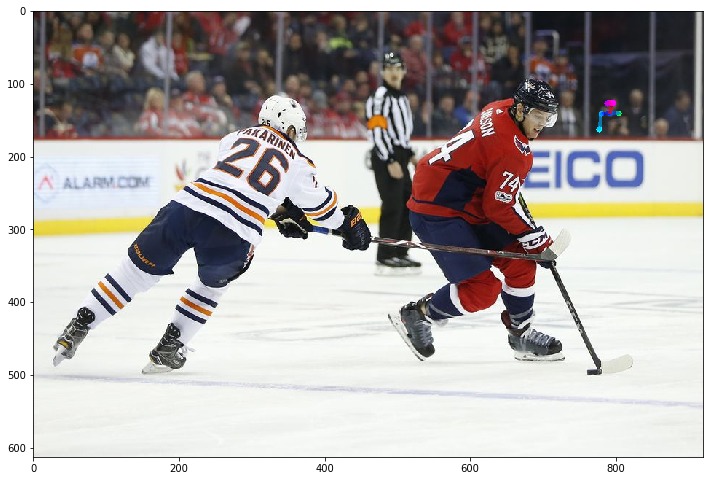

In [4]:
## Show the body parts detected
canvas = openpose_predict.drawPoseModels([3])
## Resize
plt.imshow(canvas[:,:,[2,1,0]])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 12)